# This script for task 1 to 5 (basic tasks)

# For the implimentation of the algorithm, I basically refere to the lab 04 solution code in our DRL class (called Q-LEARNING LAB CODE SOLUTION)from here:https://moodle.city.ac.uk/course/view.php?id=41658

# As for the idea of the stock market trading environment, I refere to this stock market traiding implimentation from here: https://github.com/notadamking/Stock-Trading-Environment

# Notice: I do not set random seed, and so if you re-run my codes, then you may get a bit different results.

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [219]:
#import and show the data

In [220]:
df = pd.read_csv('./AAPL.csv')
df = df.sort_values('Date')

In [221]:
df.head()

Unnamed: 0        Date   Open   High    Low  Close      Volume
0           0  1998-01-02  13.63  16.25  13.50  16.25   6411700.0
1           1  1998-01-05  16.50  16.56  15.19  15.88   5820300.0
2           2  1998-01-06  15.94  20.00  14.75  18.94  16182800.0
3           3  1998-01-07  18.81  19.00  17.31  17.50   9300200.0
4           4  1998-01-08  17.44  18.62  16.94  18.19   6910900.0

In [222]:
for i in range(len(df)-1):
    df.loc[i,"profit"] = df.loc[i+1,'Close']- df.loc[i,'Open']

In [223]:
df.head()

Unnamed: 0        Date   Open   High    Low  Close      Volume  profit
0           0  1998-01-02  13.63  16.25  13.50  16.25   6411700.0    2.25
1           1  1998-01-05  16.50  16.56  15.19  15.88   5820300.0    2.44
2           2  1998-01-06  15.94  20.00  14.75  18.94  16182800.0    1.56
3           3  1998-01-07  18.81  19.00  17.31  17.50   9300200.0   -0.62
4           4  1998-01-08  17.44  18.62  16.94  18.19   6910900.0    0.75

In [224]:
# States and Actions
S = ['1','2','3','4']
A = ['buy','sell','hold']

In [225]:
# R matrix
R =  np.array([[np.nan for a in A] for s in S])
possible_actions = [(0,0), (0,1), (0,2), (1,0), (1, 1), (1,2), (2,0), (2,1), (2,2), (3,0), (3,1), (3,2), (3,0),
                   (3,1),(3,2)]


R[0,0]=0.25#2.5 /10 as holding reward
R[1,0]=0
R[2,0]=-0.28#-2.8/10 as holding cost or penalty
R[3,0]=0
R[0,1]=np.nan
R[1,1]=0
R[2,1]=np.nan
R[3,1]=0
R[0,2]=2.5
R[1,2]=np.nan
R[2,2]=-2.8
R[3,2]=np.nan

# Q matrix
Q = np.zeros(R.shape)#itial conditon

In [226]:
print(R)#reward matrix

[[ 0.25   nan  2.5 ]
 [ 0.    0.     nan]
 [-0.28   nan -2.8 ]
 [ 0.    0.     nan]]


In [227]:
print(Q)#initial Q matrix

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


# This is the main implimentation of Q-learning with my stock trading environment. In this function, you need to specify alpha, gamma, epsilon decay, and obtain the retults to show its performance

In [228]:

def RLagent(alpha, gamma, epsilon_decay):
    epsilon = 0.9

    for i in range(len(df)-1):
        df.loc[i,"profit"] = df.loc[i+1,'Close']- df.loc[i,'Open']


# States and Actions
    S = ['0','1','2','3']
    A = ['buy','sell','hold']


# R matrix
    R =  np.array([[np.nan for a in A] for s in S])
    possible_actions = [(0,0), (0,1), (0,2), (1,0), (1, 1), (1,2), (2,0), (2,1), (2,2), (3,0), (3,1), (3,2), (3,0),
                   (3,1),(3,2)]


    R[0,0]=0.25#2.5 /10 as holding reward
    R[1,0]=0
    R[2,0]=-0.28#-2.8/10 as holding cost or penalty
    R[3,0]=0
    R[0,1]=np.nan
    R[1,1]=0
    R[2,1]=np.nan
    R[3,1]=0
    R[0,2]=2.5
    R[1,2]=np.nan
    R[2,2]=-2.8
    R[3,2]=np.nan

# Q matrix
    Q = np.zeros(R.shape)#itial conditon
    initial_badget = 100000

#################################################### for state transition function
    State =  np.array([[np.nan for s in S] for s in S])
    possible_actions = [(0,0), (0,1), (0,2), (1,0), (1, 1), (1,2), (2,0), (2,1), (2,2), (3,0), (3,1), (3,2), (3,0),
                   (3,1),(3,2)]
#################################################### 


    State[0,0]=0
    State[1,0]=0
    State[2,0]=0
    State[3,0]=0

    State[0,1]=0
    State[1,1]=0
    State[2,1]=0
    State[3,1]=0

    State[0,2]=0
    State[1,2]=0
    State[2,2]=0
    State[3,2]=0

    State[3,3]=0
    State[0,3]=0
    State[1,3]=0
    State[2,3]=0
    State[3,3]=0


############################################################################################################### Q value containers
    q1=[]
    q2=[]
    q3=[]
    q4=[]
    q5=[]
    q6=[]
    q7=[]
    q8=[]
    q9=[]
    q10=[]
    q11=[]
    q12=[]
    ee=[]
#######################################

    for episode in range(2000):

        initial_date = np.random.randint(4953,5253)# take the initial condition
        state_date=initial_date

        budget = 1000000000
    
    
        initial_stock_holds = np.random.randint(0,2)
        current_stock_holds=initial_stock_holds
        current_price=df.loc[initial_date, "Close"]
    
    #Descritize the continous states into 4 states
        if (df.loc[initial_date, "profit"]>=0) & (current_stock_holds> 0):
            s=0
        
        elif (df.loc[initial_date, "profit"]>=0) & (current_stock_holds<= 0):
            s=1
    
        elif (df.loc[initial_date, "profit"]<0) & (current_stock_holds > 0):
            s=2
        elif (df.loc[initial_date, "profit"]<0) & (current_stock_holds <=0):
            s=3    
        print("Starting state is '{}'".format(S[s]))
    
    #Run the 300 episodes
        while state_date < 5254:
        
        #Action is prohibited in the nan values in R matrix 
            available_actions = np.where(~np.isnan(R[s]))[0]

        
            q_values = [Q[s,a] for a in available_actions]
            best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
            best_actions_q_values = [Q[s,x] for x in best_actions]
        
        # Epsilon-greedy in each episode
            if np.random.uniform() > epsilon:
                a = np.random.choice(available_actions)
            
            else:
                a = np.random.choice(best_actions)
        
        
        #Now, a is crrent agent action, and so I can update my badget and based on the agent action
        #Update current badget to exit if badget <0
        
            if a == np.array(0):#anyting does not change because the action is "hold"
                current_stock_holds=current_stock_holds
                budget = budget
            
            

            
            elif a ==np.array(1):#buy
                current_stock_holds +=1
                budget -= 2.8
        
            elif a ==np.array(2):#sell
                current_stock_holds -=1
                budget += 2.5
            
                
        # Environment updating
            r = R[s,a]
        
        
            s_old = s
        
            #Need to finish while loop
            state_date +=1 
            
            #Descritize the new state (next day state) into one of 4 types.
            if (df.loc[state_date, "profit"]>=0) & (current_stock_holds> 0):
                s_new=0
        
            elif (df.loc[state_date, "profit"]>=0) & (current_stock_holds<= 0):
                s_new=1
    
            elif (df.loc[state_date, "profit"]<0) & (current_stock_holds > 0):
                s_new=2
            elif (df.loc[state_date, "profit"]<0) & (current_stock_holds <=0):
                s_new=3
            
            #Prohibit the negative number of stock if it happens (in my algorithm, it does not happen, but I put it for just in case)
            if current_stock_holds <= -1:
                break
                
            #Budget constrain, Negative budget is prohibited.
            if budget <= 0:
                break
        
        
        
        
        
        

        # Q value updating
            Q[s_old,a] = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s_new,:]) - Q[s_old,a])
            
            #count the state for state transition
            State[s_old, s_new] +=1
    

    
        q1=np.append(q1, Q[0,0])
        q2=np.append(q2, Q[1,0])
        q3=np.append(q3, Q[2,0])
        q4=np.append(q4, Q[3,0])
        q5=np.append(q5, Q[0,1])
        q6=np.append(q6, Q[1,1])
        q7=np.append(q7, Q[2,1])
        q8=np.append(q8, Q[3,1])
        q9=np.append(q9, Q[0,2])
        q10=np.append(q10, Q[1,2])
        q11=np.append(q11, Q[2,2])
        q12=np.append(q12, Q[3,2])
    
    #update ε value
        if epsilon >= 0.5:
            epsilon = epsilon_decay*epsilon
    
        elif epsilon < 0.5:
            epsilon = (0.1*epsilon_decay)*epsilon
        
        if epsilon <= 0.01:
            epsilon = epsilon
        
        ee=np.append(ee,epsilon)
    

    
    
    
    
        print('Episode {} finished. Q matrix values:\n{}'.format(episode,Q.round(1)))
    
    q_vals = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12]
    q_average= q1+q2+q3+q4+q5+q6+q7+q8+q9+q10+q11+q12
    Q_last = Q
    
    
    return q_vals, q_average, Q_last, State










# The base line experiment corresponds to task 4

In [229]:
alpha =0.5
gamma =0.5
epsilon_decay=0.9999

q_vals1, q_average1, Q_last1,State= RLagent(alpha, gamma, epsilon_decay)

Starting state is '3'
Episode 0 finished. Q matrix values:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Starting state is '3'
Episode 1 finished. Q matrix values:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Starting state is '3'
Episode 2 finished. Q matrix values:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Starting state is '3'
Episode 3 finished. Q matrix values:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Starting state is '0'
Episode 4 finished. Q matrix values:
[[0.  0.  1.2]
 [0.  0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]]
Starting state is '1'
Episode 5 finished. Q matrix values:
[[0.  0.  1.2]
 [0.  0.5 0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]]
Starting state is '1'
Episode 6 finished. Q matrix values:
[[0.  0.  1.2]
 [0.5 0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]]
Starting state is '2'
Episode 7 finished. Q matrix values:
[[ 0.   0.   1.2]
 [ 0.5  0.   0. ]
 [-0.1  0.  -1.4]
 [ 0.   0.   0. ]]
Starting state is '3'
Episode 8 finished. Q matrix values:
[[ 0.   0.   1.2]

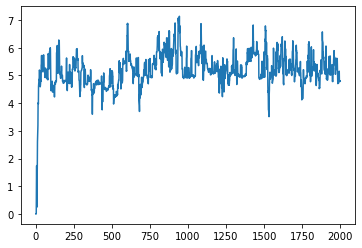

In [230]:
plt.plot(q_average1)

In [231]:
print(Q_last1.round(1))

[[ 0.8  0.   3.1]
 [ 0.2  1.2  0. ]
 [ 0.3  0.  -2.3]
 [ 0.2  1.2  0. ]]


### Point: State transition matrix is manually calculated. Thus, if you rerun the code, then, you need to manually calculate it.

In [232]:
print(State)

[[2.2000e+01 4.1000e+02 2.4000e+01 2.0000e+02]
 [4.4142e+04 8.8600e+02 3.4994e+04 6.5900e+02]
 [2.4330e+03 2.8760e+03 1.9450e+03 2.2560e+03]
 [3.6747e+04 8.9200e+02 2.8419e+04 6.8700e+02]]


In [274]:
print(State/(22+410+24+200+44142+886+34994+659+2433+2876+1945+2256+36747+892+28419+687))


[[1.39600995e-04 2.60165491e-03 1.52291995e-04 1.26909995e-03]
 [2.80103051e-01 5.62211280e-03 2.22054419e-01 4.18168435e-03]
 [1.54386009e-02 1.82496573e-02 1.23419971e-02 1.43154475e-02]
 [2.33178080e-01 5.66018580e-03 1.80332758e-01 4.35935834e-03]]


In [285]:
state_data = [[1.39600995e-04, 2.60165491e-03, 1.52291995e-04, 1.26909995e-03],
             [2.80103051e-01, 5.62211280e-03, 2.22054419e-01, 4.18168435e-03],
             [1.54386009e-02, 1.82496573e-02, 1.23419971e-02, 1.43154475e-02],
             [2.33178080e-01, 5.66018580e-03, 1.80332758e-01, 4.35935834e-03]]
state_data = pd.DataFrame(state_data)
state_data.columns = ['s0', 's1', 's2', 's3']
state_data.index=['s0', 's1', 's2', 's3']
state_data

s0        s1        s2        s3
s0  0.000140  0.002602  0.000152  0.001269
s1  0.280103  0.005622  0.222054  0.004182
s2  0.015439  0.018250  0.012342  0.014315
s3  0.233178  0.005660  0.180333  0.004359

# Lots of experiments with different hyper parameter choices for task 5

# 2nd experiment with alpha=0.2 and gamma =0.5

In [233]:
alpha =0.2
gamma =0.5
epsilon_decay=0.9999

q_vals2, q_average2, Q_last2,State2= RLagent(alpha, gamma, epsilon_decay)

Starting state is '0'
Episode 0 finished. Q matrix values:
[[0.1 0.  0.5]
 [0.  0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]]
Starting state is '0'
Episode 1 finished. Q matrix values:
[[0.1 0.  0.9]
 [0.  0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]]
Starting state is '3'
Episode 2 finished. Q matrix values:
[[0.1 0.  0.9]
 [0.  0.  0. ]
 [0.  0.  0. ]
 [0.1 0.2 0. ]]
Starting state is '1'
Episode 3 finished. Q matrix values:
[[0.1 0.  0.9]
 [0.1 0.2 0. ]
 [0.  0.  0. ]
 [0.1 0.2 0. ]]
Starting state is '2'
Episode 4 finished. Q matrix values:
[[ 0.1  0.   0.9]
 [ 0.1  0.2  0. ]
 [-0.2  0.  -0.5]
 [ 0.1  0.2  0. ]]
Starting state is '0'
Episode 5 finished. Q matrix values:
[[ 0.1  0.   1.2]
 [ 0.1  0.2  0. ]
 [-0.2  0.  -0.5]
 [ 0.1  0.2  0. ]]
Starting state is '3'
Episode 6 finished. Q matrix values:
[[ 0.1  0.   1.2]
 [ 0.1  0.2  0. ]
 [-0.2  0.  -0.5]
 [ 0.1  0.3  0. ]]
Starting state is '2'
Episode 7 finished. Q matrix values:
[[ 0.1  0.   1.2]
 [ 0.1  0.2  0. ]
 [-0.1  0.  -1. ]
 [ 0.1  0.3

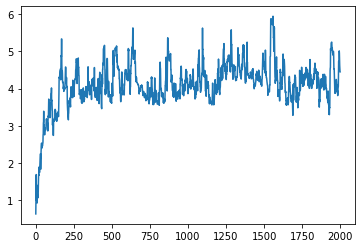

In [234]:
plt.plot(q_average2)


In [235]:
print(Q_last2.round(1))

[[ 1.1  0.   2.9]
 [ 0.4  0.8  0. ]
 [ 0.2  0.  -2.4]
 [ 0.4  0.9  0. ]]


# 3rd experiment alpha = 0.9 and gamma = 0.5

In [236]:
alpha =0.9
gamma =0.5
epsilon_decay=0.9999

q_vals3, q_average3, Q_last3,State3= RLagent(alpha, gamma, epsilon_decay)

Starting state is '1'
Episode 0 finished. Q matrix values:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Starting state is '1'
Episode 1 finished. Q matrix values:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Starting state is '3'
Episode 2 finished. Q matrix values:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Starting state is '2'
Episode 3 finished. Q matrix values:
[[ 0.   0.   0. ]
 [ 0.   0.   0. ]
 [-0.3  0.  -2.5]
 [ 0.   0.   0. ]]
Starting state is '0'
Episode 4 finished. Q matrix values:
[[ 0.3  0.   2.2]
 [ 0.   0.   0. ]
 [-0.3  0.  -2.5]
 [ 0.   0.   0. ]]
Starting state is '0'
Episode 5 finished. Q matrix values:
[[ 0.3  0.   2.5]
 [ 0.   0.   0. ]
 [-0.3  0.  -2.5]
 [ 0.   0.   0. ]]
Starting state is '2'
Episode 6 finished. Q matrix values:
[[ 0.3  0.   2.5]
 [ 0.   0.   0. ]
 [-0.3  0.  -2.8]
 [ 0.   0.   0. ]]
Starting state is '0'
Episode 7 finished. Q matrix values:
[[ 0.3  0.   2.5]
 [ 0.   0.   0. ]
 [-0.3  0.  -2.8]
 [ 0.   0.   0. ]]
Starting state i

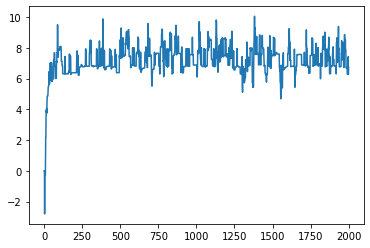

In [237]:
plt.plot(q_average3)

In [238]:
print(Q_last3.round(1))

[[ 1.   0.   3.3]
 [ 0.3  1.6  0. ]
 [ 0.5  0.  -2. ]
 [ 1.6  0.3  0. ]]


# 4th experiment alpha = 0.5 & gamma = 0.2

In [239]:
alpha =0.5
gamma =0.2
epsilon_decay=0.9999

q_vals4, q_average4, Q_last4,State4= RLagent(alpha, gamma, epsilon_decay)

Starting state is '1'
Episode 0 finished. Q matrix values:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Starting state is '0'
Episode 1 finished. Q matrix values:
[[0.  0.  1.2]
 [0.  0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]]
Starting state is '1'
Episode 2 finished. Q matrix values:
[[0.  0.  1.2]
 [0.2 0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]]
Starting state is '2'
Episode 3 finished. Q matrix values:
[[ 0.   0.   1.2]
 [ 0.2  0.   0. ]
 [-0.2  0.  -1.4]
 [ 0.   0.   0. ]]
Starting state is '2'
Episode 4 finished. Q matrix values:
[[ 0.   0.   1.2]
 [ 0.2  0.   0. ]
 [-0.3  0.  -2.1]
 [ 0.   0.   0. ]]
Starting state is '3'
Episode 5 finished. Q matrix values:
[[ 0.   0.   1.2]
 [ 0.2  0.   0. ]
 [-0.3  0.  -2.1]
 [ 0.2  0.   0. ]]
Starting state is '2'
Episode 6 finished. Q matrix values:
[[ 0.   0.   1.2]
 [ 0.2  0.   0. ]
 [-0.2  0.  -2.4]
 [ 0.2  0.   0. ]]
Starting state is '1'
Episode 7 finished. Q matrix values:
[[ 0.   0.   1.2]
 [ 0.   0.2  0. ]
 [-0.2  0.  -2.4]
 [ 0.2  0. 

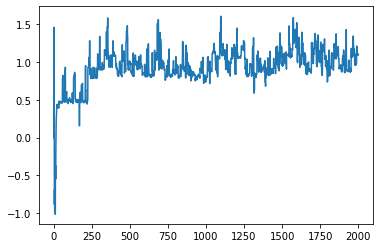

In [240]:
plt.plot(q_average4)

In [241]:
print(Q_last4.round(1))

[[ 0.5  0.   2.6]
 [ 0.   0.4  0. ]
 [-0.2  0.  -2.7]
 [ 0.3  0.3  0. ]]


# 5th experiment alpha = 0.5 & gamma = 0.9

In [242]:
alpha =0.5
gamma =0.9
epsilon_decay=0.9999

q_vals5, q_average5, Q_last5,State5= RLagent(alpha, gamma, epsilon_decay)

Starting state is '1'
Episode 0 finished. Q matrix values:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Starting state is '2'
Episode 1 finished. Q matrix values:
[[ 0.   0.   0. ]
 [ 0.   0.   0. ]
 [-0.3  0.  -1.4]
 [ 0.   0.   0. ]]
Starting state is '0'
Episode 2 finished. Q matrix values:
[[ 0.8  0.   1.2]
 [ 0.   0.   0. ]
 [-0.3  0.  -1.4]
 [ 0.   0.   0. ]]
Starting state is '2'
Episode 3 finished. Q matrix values:
[[ 0.8  0.   1.2]
 [ 0.   0.   0. ]
 [-0.3  0.  -2.1]
 [ 0.   0.   0. ]]
Starting state is '3'
Episode 4 finished. Q matrix values:
[[ 0.8  0.   1.2]
 [ 0.   0.   0. ]
 [-0.3  0.  -2.1]
 [ 0.   0.9  0. ]]
Starting state is '1'
Episode 5 finished. Q matrix values:
[[ 0.8  0.   1.2]
 [ 0.9  0.   0. ]
 [-0.3  0.  -2.1]
 [ 0.   0.9  0. ]]
Starting state is '2'
Episode 6 finished. Q matrix values:
[[ 0.8  0.   1.2]
 [ 0.9  0.   0. ]
 [ 0.5  0.  -2.1]
 [ 0.   0.9  0. ]]
Starting state is '1'
Episode 7 finished. Q matrix values:
[[ 0.8  0.   1.2]
 [ 1.   0.5  0. ]
 [ 0.

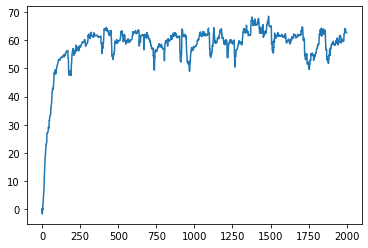

In [243]:
plt.plot(q_average5)

In [244]:
print(Q_last5.round(1))

[[ 8.2  0.  10.3]
 [ 6.9  8.7  0. ]
 [ 7.5  0.   5. ]
 [ 7.6  8.7  0. ]]


# 6th experiment alpha = 0.9 & gamma = 0.9

In [245]:
alpha =0.9
gamma =0.9
epsilon_decay=0.9999

q_vals6, q_average6, Q_last6,State6= RLagent(alpha, gamma, epsilon_decay)

Starting state is '2'
Episode 0 finished. Q matrix values:
[[ 0.   0.   0. ]
 [ 0.   0.   0. ]
 [-0.3  0.  -2.5]
 [ 0.   0.   0. ]]
Starting state is '0'
Episode 1 finished. Q matrix values:
[[ 0.   0.   2.2]
 [ 0.   0.   0. ]
 [-0.3  0.  -2.5]
 [ 0.   0.   0. ]]
Starting state is '2'
Episode 2 finished. Q matrix values:
[[ 0.   0.   2.2]
 [ 0.   0.   0. ]
 [ 1.7  0.  -2.5]
 [ 0.   0.   0. ]]
Starting state is '3'
Episode 3 finished. Q matrix values:
[[ 0.   0.   2.2]
 [ 0.   0.   0. ]
 [ 1.7  0.  -2.5]
 [ 2.   1.6  0. ]]
Starting state is '2'
Episode 4 finished. Q matrix values:
[[ 0.   0.   2.2]
 [ 0.   0.   0. ]
 [-0.1  0.  -2.8]
 [ 2.   1.6  0. ]]
Starting state is '0'
Episode 5 finished. Q matrix values:
[[ 0.   0.   2.5]
 [ 0.   0.   0. ]
 [-0.1  0.  -2.8]
 [ 2.   1.6  0. ]]
Starting state is '1'
Episode 6 finished. Q matrix values:
[[ 0.   0.   2.5]
 [ 2.2  0.   0. ]
 [-0.1  0.  -2.8]
 [ 2.   1.6  0. ]]
Starting state is '1'
Episode 7 finished. Q matrix values:
[[ 0.   0.   2.5]

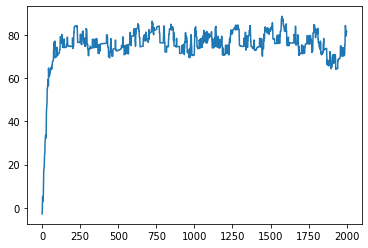

In [246]:
plt.plot(q_average6)

In [247]:
print(Q_last6.round(1))

[[10.2  0.  12.5]
 [11.2  8.8  0. ]
 [ 9.6  0.   7.1]
 [11.  11.   0. ]]


# 7th experiment aplha = 0.2 & gamma = 0.9

In [248]:
alpha =0.2
gamma =0.9
epsilon_decay=0.9999

q_vals7, q_average7, Q_last7,State7= RLagent(alpha, gamma, epsilon_decay)

Starting state is '3'
Episode 0 finished. Q matrix values:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Starting state is '0'
Episode 1 finished. Q matrix values:
[[0.  0.  0.5]
 [0.  0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]]
Starting state is '3'
Episode 2 finished. Q matrix values:
[[0.  0.  0.5]
 [0.  0.  0. ]
 [0.  0.  0. ]
 [0.1 0.2 0. ]]
Starting state is '3'
Episode 3 finished. Q matrix values:
[[0.  0.  0.5]
 [0.  0.  0. ]
 [0.  0.  0. ]
 [0.1 0.2 0. ]]
Starting state is '2'
Episode 4 finished. Q matrix values:
[[ 0.   0.   0.5]
 [ 0.   0.   0. ]
 [-0.2  0.  -0.5]
 [ 0.1  0.2  0. ]]
Starting state is '3'
Episode 5 finished. Q matrix values:
[[ 0.   0.   0.5]
 [ 0.   0.   0. ]
 [-0.2  0.  -0.5]
 [ 0.1  0.2  0. ]]
Starting state is '0'
Episode 6 finished. Q matrix values:
[[ 0.   0.   0.9]
 [ 0.   0.   0. ]
 [-0.2  0.  -0.5]
 [ 0.1  0.2  0. ]]
Starting state is '0'
Episode 7 finished. Q matrix values:
[[ 0.   0.   1.3]
 [ 0.   0.   0. ]
 [-0.2  0.  -0.5]
 [ 0.1  0.2  0. ]]
Star

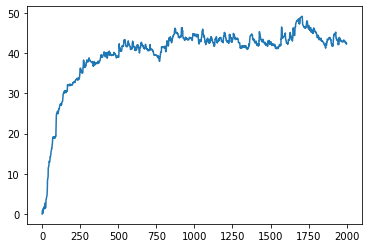

In [249]:
plt.plot(q_average7)

In [250]:
print(Q_last7.round(1))

[[5.8 0.  7.7]
 [5.  5.8 0. ]
 [4.9 0.  2.4]
 [5.  5.7 0. ]]


# 8th experiment aplha = 0.2 & gamma =0.2

In [251]:
alpha =0.2
gamma =0.2
epsilon_decay=0.9999

q_vals8, q_average8, Q_last8,State8= RLagent(alpha, gamma, epsilon_decay)

Starting state is '1'
Episode 0 finished. Q matrix values:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Starting state is '1'
Episode 1 finished. Q matrix values:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Starting state is '1'
Episode 2 finished. Q matrix values:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Starting state is '1'
Episode 3 finished. Q matrix values:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Starting state is '2'
Episode 4 finished. Q matrix values:
[[ 0.   0.   0. ]
 [ 0.   0.   0. ]
 [-0.3  0.  -0.6]
 [ 0.   0.   0. ]]
Starting state is '0'
Episode 5 finished. Q matrix values:
[[ 0.3  0.   0.5]
 [ 0.   0.   0. ]
 [-0.3  0.  -0.6]
 [ 0.   0.   0. ]]
Starting state is '3'
Episode 6 finished. Q matrix values:
[[ 0.3  0.   0.5]
 [ 0.   0.   0. ]
 [-0.3  0.  -0.6]
 [ 0.   0.1  0. ]]
Starting state is '1'
Episode 7 finished. Q matrix values:
[[ 0.3  0.   0.5]
 [ 0.   0.   0. ]
 [-0.3  0.  -0.6]
 [ 0.   0.1  0. ]]
Starting state is '3'
Episode 8 finished

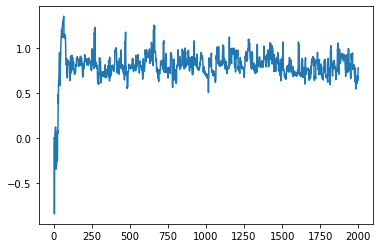

In [252]:
plt.plot(q_average8)

In [253]:
print(Q_last8.round(1))

[[ 0.4  0.   2.6]
 [ 0.3  0.1  0. ]
 [-0.2  0.  -2.7]
 [ 0.2  0.2  0. ]]


# 9th experiment aplha = 0.9 & gamma = 0.2

In [254]:
alpha =0.9
gamma =0.2
epsilon_decay=0.9999

q_vals9, q_average9, Q_last9,State9= RLagent(alpha, gamma, epsilon_decay)

Starting state is '0'
Episode 0 finished. Q matrix values:
[[0.3 0.  2.2]
 [0.  0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]]
Starting state is '1'
Episode 1 finished. Q matrix values:
[[0.3 0.  2.2]
 [0.4 0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0. ]]
Starting state is '3'
Episode 2 finished. Q matrix values:
[[0.3 0.  2.2]
 [0.4 0.  0. ]
 [0.  0.  0. ]
 [0.  0.4 0. ]]
Starting state is '0'
Episode 3 finished. Q matrix values:
[[0.3 0.  2.6]
 [0.4 0.  0. ]
 [0.  0.  0. ]
 [0.  0.4 0. ]]
Starting state is '1'
Episode 4 finished. Q matrix values:
[[0.3 0.  2.6]
 [0.5 0.  0. ]
 [0.  0.  0. ]
 [0.  0.4 0. ]]
Starting state is '2'
Episode 5 finished. Q matrix values:
[[ 0.3  0.   2.6]
 [ 0.5  0.   0. ]
 [-0.2  0.  -2.4]
 [ 0.   0.4  0. ]]
Starting state is '0'
Episode 6 finished. Q matrix values:
[[ 0.3  0.   2.6]
 [ 0.5  0.   0. ]
 [-0.2  0.  -2.4]
 [ 0.   0.4  0. ]]
Starting state is '1'
Episode 7 finished. Q matrix values:
[[ 0.3  0.   2.6]
 [ 0.5  0.   0. ]
 [-0.2  0.  -2.4]
 [ 0.   0.4  0. ]]
Star

In [256]:
print(Q_last1)

[[ 0.76963587  0.          3.10506068]
 [ 0.19402162  1.21364276  0.        ]
 [ 0.31859409  0.         -2.25013444]
 [ 0.22672317  1.22083776  0.        ]]


In [257]:
print(Q_last5)

[[ 8.20830702  0.         10.30238478]
 [ 6.86579804  8.67476275  0.        ]
 [ 7.51231421  0.          4.95932068]
 [ 7.58259819  8.65520202  0.        ]]


# 10the Experiment only for α = 0.9, γ= 0.9 model (best performed model between 1st and 9the experiments) with different epsilon decay

In [258]:
alpha =0.9
gamma =0.9
epsilon_decay=0.3

q_vals10, q_average10, Q_last10,State10= RLagent(alpha, gamma, epsilon_decay)

Starting state is '1'
Episode 0 finished. Q matrix values:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Starting state is '2'
Episode 1 finished. Q matrix values:
[[ 0.   0.   0. ]
 [ 0.   0.   0. ]
 [-0.3  0.  -2.5]
 [ 0.   0.   0. ]]
Starting state is '2'
Episode 2 finished. Q matrix values:
[[ 0.   0.   0. ]
 [ 0.   0.   0. ]
 [-0.3  0.  -2.8]
 [ 0.   0.   0. ]]
Starting state is '0'
Episode 3 finished. Q matrix values:
[[ 0.6  0.   2.2]
 [ 0.   0.   0. ]
 [-0.3  0.  -2.8]
 [ 0.   0.   0. ]]
Starting state is '1'
Episode 4 finished. Q matrix values:
[[ 0.6  0.   2.2]
 [ 1.8  1.8  0. ]
 [-0.3  0.  -2.8]
 [ 0.   0.   0. ]]
Starting state is '0'
Episode 5 finished. Q matrix values:
[[ 1.7  0.   4. ]
 [ 1.8  1.8  0. ]
 [-0.3  0.  -2.8]
 [ 0.   0.   0. ]]
Starting state is '2'
Episode 6 finished. Q matrix values:
[[ 1.7  0.   4. ]
 [ 1.8  1.8  0. ]
 [-0.3  0.  -2.8]
 [ 0.   0.   0. ]]
Starting state is '2'
Episode 7 finished. Q matrix values:
[[ 1.7  0.   4. ]
 [ 1.8  1.8  0. ]
 [ 2.

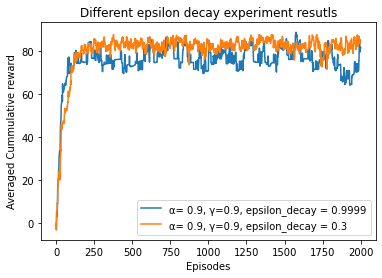

In [259]:
plt.plot(q_average6, label ="α= 0.9, γ=0.9, epsilon_decay = 0.9999")
plt.plot(q_average10, label ="α= 0.9, γ=0.9, epsilon_decay = 0.3")
plt.xlabel("Episodes")
plt.ylabel("Averaged Cummulative reward")
plt.title("Different epsilon decay experiment resutls")

plt.legend()

plt.show()

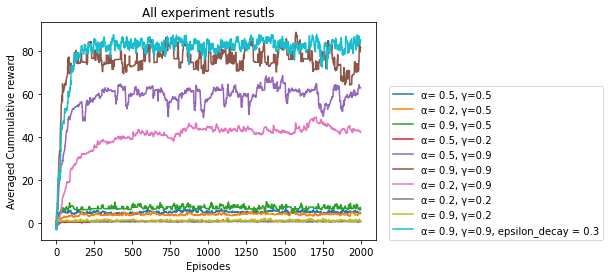

In [286]:
#I refre to how to add legends to my plot from here:https://pythonprogramming.net/legends-titles-labels-matplotlib-tutorial/

plt.plot(q_average1, label ="α= 0.5, γ=0.5")
plt.plot(q_average2 ,label ="α= 0.2, γ=0.5")
plt.plot(q_average3, label ="α= 0.9, γ=0.5")
plt.plot(q_average4, label ="α= 0.5, γ=0.2")
plt.plot(q_average5, label ="α= 0.5, γ=0.9")
plt.plot(q_average6, label ="α= 0.9, γ=0.9")
plt.plot(q_average7, label ="α= 0.2, γ=0.9")
plt.plot(q_average8, label ="α= 0.2, γ=0.2")
plt.plot(q_average9, label ="α= 0.9, γ=0.2")
plt.plot(q_average10, label ="α= 0.9, γ=0.9, epsilon_decay = 0.3")
plt.xlabel("Episodes")
plt.ylabel("Averaged Cummulative reward")
plt.title("All experiment resutls")
plt.legend(loc=(1.04,0))


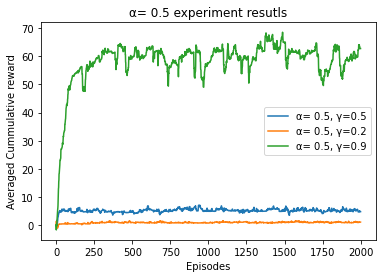

In [260]:
plt.plot(q_average1, label ="α= 0.5, γ=0.5")
plt.plot(q_average4, label ="α= 0.5, γ=0.2")
plt.plot(q_average5, label ="α= 0.5, γ=0.9")
plt.xlabel("Episodes")
plt.ylabel("Averaged Cummulative reward")
plt.title("α= 0.5 experiment resutls")

plt.legend()

plt.show()

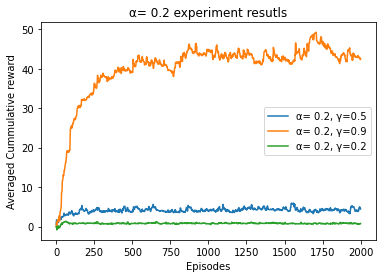

In [261]:

plt.plot(q_average2 ,label ="α= 0.2, γ=0.5")

plt.plot(q_average7, label ="α= 0.2, γ=0.9")
plt.plot(q_average8, label ="α= 0.2, γ=0.2")
plt.xlabel("Episodes")
plt.ylabel("Averaged Cummulative reward")
plt.title("α= 0.2 experiment resutls")


plt.legend()

plt.show()

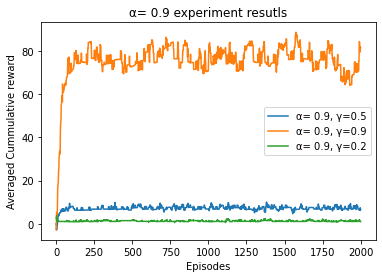

In [262]:

plt.plot(q_average3, label ="α= 0.9, γ=0.5")

plt.plot(q_average6, label ="α= 0.9, γ=0.9")

plt.plot(q_average9, label ="α= 0.9, γ=0.2")
plt.xlabel("Episodes")
plt.ylabel("Averaged Cummulative reward")
plt.title("α= 0.9 experiment resutls")
plt.legend()

plt.show()

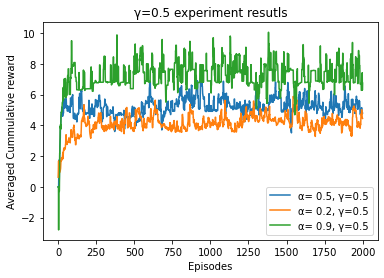

In [263]:
plt.plot(q_average1, label ="α= 0.5, γ=0.5")
plt.plot(q_average2 ,label ="α= 0.2, γ=0.5")
plt.plot(q_average3, label ="α= 0.9, γ=0.5")
plt.xlabel("Episodes")
plt.ylabel("Averaged Cummulative reward")
plt.title("γ=0.5 experiment resutls")

plt.legend()

plt.show()

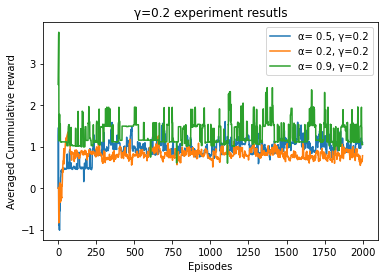

In [264]:

plt.plot(q_average4, label ="α= 0.5, γ=0.2")

plt.plot(q_average8, label ="α= 0.2, γ=0.2")
plt.plot(q_average9, label ="α= 0.9, γ=0.2")
plt.xlabel("Episodes")
plt.ylabel("Averaged Cummulative reward")
plt.title("γ=0.2 experiment resutls")
plt.legend()

plt.show()

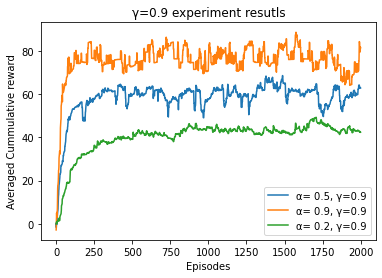

In [265]:

plt.plot(q_average5, label ="α= 0.5, γ=0.9")
plt.plot(q_average6, label ="α= 0.9, γ=0.9")
plt.plot(q_average7, label ="α= 0.2, γ=0.9")
plt.xlabel("Episodes")
plt.ylabel("Averaged Cummulative reward")
plt.title("γ=0.9 experiment resutls")

plt.legend()

plt.show()

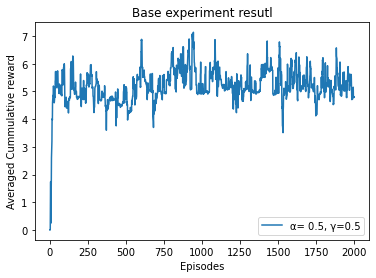

In [266]:
plt.plot(q_average1, label ="α= 0.5, γ=0.5")

plt.xlabel("Episodes")
plt.ylabel("Averaged Cummulative reward")
plt.title("Base experiment resutl")

plt.legend()

plt.show()